# <center> <img src="figs/logo_facens.png" alt="Logo Facens" width="110" align="left"/>  <br/> <center>Facens<br/>
</p>

<br/>

<font size="3"><center>Victor Hugo Soares Tavares, 171689</center></font>




# Aprendizado de Máquinas
### 2022PGS2M1
----

## <center> Atividade SVM </center>


Leitura do dataset do data_cancer

O exercício Breast Cancer do Sklearn, com Padronização dos dados e Análise do PCA ( % de variancia explicada com X dimensões ), utilizar N dimensões que explique 80% da variancia, e o resultado com um GridSearch do SVM.

No grid search colocar valores de C, gamma e kernel = 'rbf', 'linear' (não precisa do 'poly' e do degree)



## Importando Libs

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, \
                            f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import datasets
import random
from sklearn.pipeline import Pipeline
from glob import glob
from tqdm.notebook import tqdm

# Nossas ferramentas
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score

# Nossos Algoritmos
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC

# Ensemble
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

In [2]:
# Análise dos Componentes

def component_analysis(e, plot='none'):
    varexp = 100* e/e.sum()
    cumvarexp = np.cumsum(varexp)

    # Plotando os autovalores
    if (plot=='eigen'):
        plt.figure(figsize = (4,4))
        plt.plot(e, '-o')
        plt.grid(True)
        plt.xlabel('Componente', fontsize = 15)
        plt.ylabel('Autovalor', fontsize = 15)
        xint = []
        locs, labels = plt.xticks()
        for each in locs:
            xint.append(int(each))
        plt.xticks(xint)

    # Plotando a explicação da variancia
    if (plot=='varexp'):
        plt.figure(figsize = (4,4))
        plt.plot(cumvarexp, '-o')
        plt.xlabel('Componente', fontsize = 15)
        plt.ylabel('% da variancia explicada', fontsize = 15)
        plt.grid(True)
        xint = []
        locs, labels = plt.xticks()
        for each in locs:
            xint.append(int(each))
        plt.xticks(xint)

    plt.show()

<strong>Leitura do dataset<strong/>

In [5]:
cancer = datasets.load_breast_cancer(as_frame=True)

<strong>Normalização dos dados / Split do Dataset<strong/>

In [14]:
X = cancer.data
y = cancer.target

In [15]:
sc = StandardScaler()
X_norm = sc.fit_transform(X)

In [16]:
pca = PCA(5)
X_pca = pca.fit_transform(X_norm)

In [17]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768])

In [18]:
pca.explained_variance_ratio_.sum()

0.8473427431636312

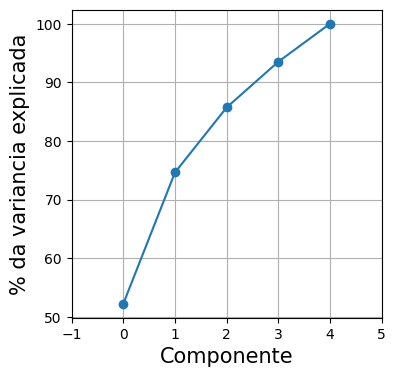

In [19]:
component_analysis(pca.explained_variance_ratio_, plot='varexp')

In [20]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=0)

In [21]:
# Defini-se os ranges dos parametros
param_grid = {
    'C': [1, 10, 100],
    'gamma': [1, 10, 100],
    'kernel': ['linear', 'rbf']
}

In [22]:
grid_svm = GridSearchCV(SVC(), param_grid, verbose=1, cv=10)

In [23]:
grid_svm.fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 10, 100],
                         'kernel': ['linear', 'rbf']},
             verbose=1)

In [24]:
grid_svm.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

In [25]:
grid_svm.best_estimator_

SVC(C=1, gamma=1, kernel='linear')

In [26]:
y_pred = grid_svm.predict(X_test)

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        47
           1       0.96      0.97      0.96        67

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

